In [1]:
import warnings
warnings.filterwarnings('ignore')


import re
from owlready2 import get_ontology
from nltk.stem import PorterStemmer
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import joblib
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np 
import joblib
from nltk.stem import PorterStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [1]:
import psutil

# Get available memory
mem = psutil.virtual_memory()
print(f"Available Memory: {mem.available / (1024**3):.2f} GB")

Available Memory: 1.54 GB


In [3]:
from rdflib import Graph

g = Graph()
g.parse("MaCOntoFile.owl", format="xml")  # Try "turtle" if XML fails
print(len(g))  # Check the number of triples

8958


In [4]:
# Query for OWL classes
query_classes = """
SELECT ?class WHERE {
    ?class a owl:Class .
}
"""

# Execute the query
for row in g.query(query_classes):
    print(row[0])  # Print the class URI


Nd9e486fa8e784f9885c8c7908cd91e5a
N49577b790e45481d825596008df32b40
Nd77758129d9b48abaff1ca65f3c15f45
Nf1602cf2ed0b4b3893d64c7720d43ec3
N9e6afd9feb4e48939551a03a9aca6603
Nf1cc6556b3ad4f1a9a459a6c142cd4e8
Na7bb07fb9cb74f1a956f701b3058a2fe
N0ea1c7f9ec5c4acdb281f441c460ec42
Ne39d4512737d4f799dff0353fbfec17f
Nfd276719697d4a8d8dbff449daf9e252
N47b5a349b1824d24a99ec364672f9eb6
Nc65457ebe2c0442fb51813115a7a10a6
N60c7576a8c644516a6b002a25a34bf5d
Nec5b10a29f07401eb95508e6eac97778
N85eabb16967e44b7b655edfcc4566653
N860ce6ac021a4b728aa43f5f575e78ec
Nc7949681077f42d4b670a261b4a40faa
Nd81e4373ac6a48c9ac46b8ccf8a9b989
http://www.semanticweb.org/hp/ontologies/2018/11/untitled-ontology-38#AbioticStress
http://www.semanticweb.org/hp/ontologies/2018/11/untitled-ontology-38#Acreage
http://www.semanticweb.org/hp/ontologies/2018/11/untitled-ontology-38#AgriculturalInstitute
http://www.semanticweb.org/hp/ontologies/2018/11/untitled-ontology-38#Agronomical
http://www.semanticweb.org/hp/ontologies/2018/11/unt

In [5]:
# !pip install rdflib

In [16]:
# Define RDF, RDFS, and OWL prefixes
from rdflib import URIRef



query_relations = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl: <http://www.w3.org/2002/07/owl#>

SELECT ?property ?domain ?range WHERE {
    ?property a ?type .
    FILTER (?type IN (rdf:Property, owl:ObjectProperty, owl:DatatypeProperty))
    
    OPTIONAL { ?property rdfs:domain ?domain . }
    OPTIONAL { ?property rdfs:range ?range . }
}
"""

# Execute query
results = g.query(query_relations)

pattern_collector = []

def get_local_name(uri):
    """ Extracts the local name from a URI (removes namespace). """
    if isinstance(uri, URIRef):
        return uri.split("#")[-1] if "#" in uri else uri.split("/")[-1]
    return uri  # Return as-is if it's not a URIRef

# Execute query
for row in results:
    prop_name = get_local_name(row.property)
    domain_name = get_local_name(row.domain) if row.domain else "None"
    range_name = get_local_name(row.range) if row.range else "None"
    
    print(f"Property: {prop_name}, Domain: {domain_name}, Range: {range_name}")
    pattern_collector.append(f'{domain_name}, {prop_name}, {range_name}')

# Debugging: Check if any results are returned
if len(results) == 0:
    print("No properties found. Check ontology content and namespaces.")


print(len(pattern_collector))

Property: adequate, Domain: None, Range: None
Property: adequate_for, Domain: None, Range: None
Property: affects, Domain: Fertilizers, Range: Corn
Property: affects, Domain: Fertilizers, Range: Crop
Property: affects, Domain: Fertilizers, Range: Maize
Property: affects, Domain: Fertilizers, Range: MaizeGrass
Property: affects, Domain: Fertilizers, Range: MaizeCrop
Property: affects, Domain: Fertilizers, Range: Nd9e486fa8e784f9885c8c7908cd91e5a
Property: affects, Domain: Fertilizers, Range: N06767384403049a1911e623e25836ec8
Property: affects, Domain: Fertilizers, Range: N3b58e43f5efd47149979e5d6f0bf238e
Property: affects, Domain: Manures, Range: Corn
Property: affects, Domain: Manures, Range: Crop
Property: affects, Domain: Manures, Range: Maize
Property: affects, Domain: Manures, Range: MaizeGrass
Property: affects, Domain: Manures, Range: MaizeCrop
Property: affects, Domain: Manures, Range: Nd9e486fa8e784f9885c8c7908cd91e5a
Property: affects, Domain: Manures, Range: N06767384403049a1

In [18]:
pattern_collector[:30]

['None, adequate, None',
 'None, adequate_for, None',
 'Fertilizers, affects, Corn',
 'Fertilizers, affects, Crop',
 'Fertilizers, affects, Maize',
 'Fertilizers, affects, MaizeGrass',
 'Fertilizers, affects, MaizeCrop',
 'Fertilizers, affects, Nd9e486fa8e784f9885c8c7908cd91e5a',
 'Fertilizers, affects, N06767384403049a1911e623e25836ec8',
 'Fertilizers, affects, N3b58e43f5efd47149979e5d6f0bf238e',
 'Manures, affects, Corn',
 'Manures, affects, Crop',
 'Manures, affects, Maize',
 'Manures, affects, MaizeGrass',
 'Manures, affects, MaizeCrop',
 'Manures, affects, Nd9e486fa8e784f9885c8c7908cd91e5a',
 'Manures, affects, N06767384403049a1911e623e25836ec8',
 'Manures, affects, N3b58e43f5efd47149979e5d6f0bf238e',
 'Disease, affectsYieldsOf, Corn',
 'Disease, affectsYieldsOf, Crop',
 'Disease, affectsYieldsOf, Maize',
 'Disease, affectsYieldsOf, N49577b790e45481d825596008df32b40',
 'Disease, affectsYieldsOf, N4ee6ba3dc44e477a8f668aeaddafb328',
 'Disease, affectsYieldsOf, N1a6157fad2a74cb789eb8

In [19]:
# romove same work occuring side by side
def remove_consecutive_duplicates(words):
    result = []
    for i, word in enumerate(words):
        # Add the word only if it's not the same as the previous word
        if i == 0 or word != words[i - 1]:
            result.append(word)
    return result

# clean single doc
def clean_doc(doc):
    # remove empty list
    clean = [samp for samp in doc.split(' ') if samp != '']

    # remove underscore
    clean_doc = []
    cln_data = ''
    for cln in clean: 
        cln_data = ' '.join(cln.split('_'))
        clean_doc.extend(cln_data.split(' '))

    # making first letter capital...
    clean_doc = ' '.join([cln_d[0].upper() + cln_d[1:] for cln_d in clean_doc])


    # Splitting based on Cap Text
    clean_doc = re.findall(r'[A-Z][a-z]*|[a-z]*[A-Z][a-z]*', clean_doc)
    # print(text)
    # remove side by side reoccuring word
    final_clean_document  = remove_consecutive_duplicates(clean_doc)    
    # convert all to small cap
    final_clean_document = [doc.lower() for doc in final_clean_document]

    return final_clean_document

# looping through the document in the 
# ontology file... 
def clean_docs(documents): 
    document = []
    for doc in documents:
        document.append(clean_doc(doc))
        
    return document

clean_docs = clean_docs(pattern_collector)
clean_docs[:5]

[['none', 'adequate', 'none'],
 ['none', 'adequate', 'for', 'none'],
 ['fertilizers', 'affects', 'corn'],
 ['fertilizers', 'affects', 'crop'],
 ['fertilizers', 'affects', 'maize']]

In [235]:
# generating Structural table... 
data = {'ont_doc': pattern_collector, 'clean_doc': clean_docs}
dataset = pd.DataFrame(data)
dataset

,ont_doc,clean_doc
0,"None, adequate, None","[none, adequate, none]"
1,"None, adequate_for, None","[none, adequate, for, none]"
2,"Fertilizers, affects, Corn","[fertilizers, affects, corn]"
3,"Fertilizers, affects, Crop","[fertilizers, affects, crop]"
4,"Fertilizers, affects, Maize","[fertilizers, affects, maize]"
...,...,...
1662,"Fertilizer_Application_Methods, isUsedInHillyA...","[fertilizer, application, methods, is, used, i..."
1663,"AerialApplicationMethod, isUsedInHillyAreas, s...","[aerial, application, method, is, used, in, hi..."
1664,"SoilAmendmentMaterials, requiresFertilizer, st...","[soil, amendment, materials, requires, fertili..."
1665,"Irrigation_Methods, suitabilityOfIrrigationMet...","[irrigation, methods, suitability, of, irrigat..."


In [236]:
dataset.ont_doc 

0                                    None, adequate, None
1                                None, adequate_for, None
2                              Fertilizers, affects, Corn
3                              Fertilizers, affects, Crop
4                             Fertilizers, affects, Maize
                              ...                        
1662    Fertilizer_Application_Methods, isUsedInHillyA...
1663    AerialApplicationMethod, isUsedInHillyAreas, s...
1664    SoilAmendmentMaterials, requiresFertilizer, st...
1665    Irrigation_Methods, suitabilityOfIrrigationMet...
1666         Irrigation_Methods, suitableForMaize, string
Name: ont_doc, Length: 1667, dtype: object

In [237]:
def clean_noise(text):
    pattern = r"N[a-fA-F0-9]{32}"
    # Check if the pattern exists in the string
    match = re.search(pattern, text)
    if match: return True
    else: return False

In [238]:
count = 0
samples = []
for row in dataset['ont_doc']: 
    if 'None' in row: 
        # count = count + 1
        samples.append(row)
    
    if clean_noise(row): 
        count = count + 1
        print(row)

print(count)

Fertilizers, affects, Nd9e486fa8e784f9885c8c7908cd91e5a
Fertilizers, affects, N06767384403049a1911e623e25836ec8
Fertilizers, affects, N3b58e43f5efd47149979e5d6f0bf238e
Manures, affects, Nd9e486fa8e784f9885c8c7908cd91e5a
Manures, affects, N06767384403049a1911e623e25836ec8
Manures, affects, N3b58e43f5efd47149979e5d6f0bf238e
Disease, affectsYieldsOf, N49577b790e45481d825596008df32b40
Disease, affectsYieldsOf, N4ee6ba3dc44e477a8f668aeaddafb328
Disease, affectsYieldsOf, N1a6157fad2a74cb789eb8c661b9e837b
InsectsAndPathogens, affectsYieldsOf, N49577b790e45481d825596008df32b40
InsectsAndPathogens, affectsYieldsOf, N4ee6ba3dc44e477a8f668aeaddafb328
InsectsAndPathogens, affectsYieldsOf, N1a6157fad2a74cb789eb8c661b9e837b
Pests, affectsYieldsOf, N49577b790e45481d825596008df32b40
Pests, affectsYieldsOf, N4ee6ba3dc44e477a8f668aeaddafb328
Pests, affectsYieldsOf, N1a6157fad2a74cb789eb8c661b9e837b
Farmer, plants, Nd77758129d9b48abaff1ca65f3c15f45
Farmer, plants, N0f281e09df0b4239a0fb84ce354bb425
Farmer

In [239]:
# dataset['domain'] , dataset['property'] , dataset['range'] = dataset['ont_doc'].apply(lambda x: x.split(','))
dataset[['domain', 'property', 'range']] = dataset['ont_doc'].str.split(',', expand=True)
dataset

,ont_doc,clean_doc,domain,property,range
0,"None, adequate, None","[none, adequate, none]",None,adequate,None
1,"None, adequate_for, None","[none, adequate, for, none]",None,adequate_for,None
2,"Fertilizers, affects, Corn","[fertilizers, affects, corn]",Fertilizers,affects,Corn
3,"Fertilizers, affects, Crop","[fertilizers, affects, crop]",Fertilizers,affects,Crop
4,"Fertilizers, affects, Maize","[fertilizers, affects, maize]",Fertilizers,affects,Maize
...,...,...,...,...,...
1662,"Fertilizer_Application_Methods, isUsedInHillyA...","[fertilizer, application, methods, is, used, i...",Fertilizer_Application_Methods,isUsedInHillyAreas,string
1663,"AerialApplicationMethod, isUsedInHillyAreas, s...","[aerial, application, method, is, used, in, hi...",AerialApplicationMethod,isUsedInHillyAreas,string
1664,"SoilAmendmentMaterials, requiresFertilizer, st...","[soil, amendment, materials, requires, fertili...",SoilAmendmentMaterials,requiresFertilizer,string
1665,"Irrigation_Methods, suitabilityOfIrrigationMet...","[irrigation, methods, suitability, of, irrigat...",Irrigation_Methods,suitabilityOfIrrigationMethodsDependsOn,string


In [240]:
dataset[(dataset['domain'] == 'None')]

,ont_doc,clean_doc,domain,property,range
0,"None, adequate, None","[none, adequate, none]",None,adequate,None
1,"None, adequate_for, None","[none, adequate, for, none]",None,adequate_for,None
49,"None, byeProduct, None","[none, bye, product, none]",None,byeProduct,None
50,"None, canBeAffectedBy, None","[none, can, be, affected, by, none]",None,canBeAffectedBy,None
51,"None, causesSomeEffects, None","[none, causes, some, effects, none]",None,causesSomeEffects,None
...,...,...,...,...,...
1632,"None, hasTheAppropriateValueRange, None","[none, has, the, appropriate, value, range, none]",None,hasTheAppropriateValueRange,None
1641,"None, hasUreaRecommendation, None","[none, has, urea, recommendation, none]",None,hasUreaRecommendation,None
1651,"None, hasWeightOfContents, None","[none, has, weight, of, contents, none]",None,hasWeightOfContents,None
1652,"None, irrigationIncreases, None","[none, irrigation, increases, none]",None,irrigationIncreases,None


In [242]:
dataset[(dataset['domain'] == 'None') & (dataset['range'] == ' None')]

,ont_doc,clean_doc,domain,property,range
0,"None, adequate, None","[none, adequate, none]",None,adequate,None
1,"None, adequate_for, None","[none, adequate, for, none]",None,adequate_for,None
49,"None, byeProduct, None","[none, bye, product, none]",None,byeProduct,None
50,"None, canBeAffectedBy, None","[none, can, be, affected, by, none]",None,canBeAffectedBy,None
51,"None, causesSomeEffects, None","[none, causes, some, effects, none]",None,causesSomeEffects,None
...,...,...,...,...,...
1632,"None, hasTheAppropriateValueRange, None","[none, has, the, appropriate, value, range, none]",None,hasTheAppropriateValueRange,None
1641,"None, hasUreaRecommendation, None","[none, has, urea, recommendation, none]",None,hasUreaRecommendation,None
1651,"None, hasWeightOfContents, None","[none, has, weight, of, contents, none]",None,hasWeightOfContents,None
1652,"None, irrigationIncreases, None","[none, irrigation, increases, none]",None,irrigationIncreases,None


In [243]:
# extracting table with both domain and range non non....
dataset = dataset[(dataset['domain'] != 'None') & (dataset['range'] != ' None')]
dataset

,ont_doc,clean_doc,domain,property,range
2,"Fertilizers, affects, Corn","[fertilizers, affects, corn]",Fertilizers,affects,Corn
3,"Fertilizers, affects, Crop","[fertilizers, affects, crop]",Fertilizers,affects,Crop
4,"Fertilizers, affects, Maize","[fertilizers, affects, maize]",Fertilizers,affects,Maize
5,"Fertilizers, affects, MaizeGrass","[fertilizers, affects, maize, grass]",Fertilizers,affects,MaizeGrass
6,"Fertilizers, affects, MaizeCrop","[fertilizers, affects, maize, crop]",Fertilizers,affects,MaizeCrop
...,...,...,...,...,...
1662,"Fertilizer_Application_Methods, isUsedInHillyA...","[fertilizer, application, methods, is, used, i...",Fertilizer_Application_Methods,isUsedInHillyAreas,string
1663,"AerialApplicationMethod, isUsedInHillyAreas, s...","[aerial, application, method, is, used, in, hi...",AerialApplicationMethod,isUsedInHillyAreas,string
1664,"SoilAmendmentMaterials, requiresFertilizer, st...","[soil, amendment, materials, requires, fertili...",SoilAmendmentMaterials,requiresFertilizer,string
1665,"Irrigation_Methods, suitabilityOfIrrigationMet...","[irrigation, methods, suitability, of, irrigat...",Irrigation_Methods,suitabilityOfIrrigationMethodsDependsOn,string


In [244]:
pattern = r"N[a-fA-F0-9]{32}"

filtered_dataset = dataset[~dataset['ont_doc'].str.contains(pattern, na=False, regex=True)]
print(filtered_dataset.shape)
filtered_dataset.head(10)

(860, 5)


,ont_doc,clean_doc,domain,property,range
2,"Fertilizers, affects, Corn","[fertilizers, affects, corn]",Fertilizers,affects,Corn
3,"Fertilizers, affects, Crop","[fertilizers, affects, crop]",Fertilizers,affects,Crop
4,"Fertilizers, affects, Maize","[fertilizers, affects, maize]",Fertilizers,affects,Maize
5,"Fertilizers, affects, MaizeGrass","[fertilizers, affects, maize, grass]",Fertilizers,affects,MaizeGrass
6,"Fertilizers, affects, MaizeCrop","[fertilizers, affects, maize, crop]",Fertilizers,affects,MaizeCrop
10,"Manures, affects, Corn","[manures, affects, corn]",Manures,affects,Corn
11,"Manures, affects, Crop","[manures, affects, crop]",Manures,affects,Crop
12,"Manures, affects, Maize","[manures, affects, maize]",Manures,affects,Maize
13,"Manures, affects, MaizeGrass","[manures, affects, maize, grass]",Manures,affects,MaizeGrass
14,"Manures, affects, MaizeCrop","[manures, affects, maize, crop]",Manures,affects,MaizeCrop


In [245]:
dataset = filtered_dataset[['ont_doc', 'clean_doc']]
dataset

,ont_doc,clean_doc
2,"Fertilizers, affects, Corn","[fertilizers, affects, corn]"
3,"Fertilizers, affects, Crop","[fertilizers, affects, crop]"
4,"Fertilizers, affects, Maize","[fertilizers, affects, maize]"
5,"Fertilizers, affects, MaizeGrass","[fertilizers, affects, maize, grass]"
6,"Fertilizers, affects, MaizeCrop","[fertilizers, affects, maize, crop]"
...,...,...
1662,"Fertilizer_Application_Methods, isUsedInHillyA...","[fertilizer, application, methods, is, used, i..."
1663,"AerialApplicationMethod, isUsedInHillyAreas, s...","[aerial, application, method, is, used, in, hi..."
1664,"SoilAmendmentMaterials, requiresFertilizer, st...","[soil, amendment, materials, requires, fertili..."
1665,"Irrigation_Methods, suitabilityOfIrrigationMet...","[irrigation, methods, suitability, of, irrigat..."


In [ ]:
# Function for tagging (providing intention)
def generate_tags(row):
    # Use 'ont_doc' to create intent tags
    intent = row['ont_doc'].split(',')[0]  # First word as intent
    
    # Tag entities in 'clean_doc' using BIO tagging
    entities = row['clean_doc']
    tagged_entities = []
    for word in entities:
        if word.lower() in intent.lower():
            tagged_entities.append((word, "B-ENTITY"))  # Beginning tag
        else:
            tagged_entities.append((word, "O"))  # Outside tag
    return intent, tagged_entities

# Apply tagging to the DataFrame
dataset['intent'], dataset['entity_tags'] = zip(*dataset.apply(generate_tags, axis=1))

dataset.drop(columns=['entity_tags'], inplace=True)
dataset.head(4)

,ont_doc,clean_doc,intent
2,"Fertilizers, affects, Corn","[fertilizers, affects, corn]","Fertilizers,"
3,"Fertilizers, affects, Crop","[fertilizers, affects, crop]","Fertilizers,"
4,"Fertilizers, affects, Maize","[fertilizers, affects, maize]","Fertilizers,"
5,"Fertilizers, affects, MaizeGrass","[fertilizers, affects, maize, grass]","Fertilizers,"


In [143]:
dataset['final_doc'] = [' '.join(row) for row in dataset.clean_doc]
dataset.head(4)

,ont_doc,clean_doc,intent,final_doc
2,"Fertilizers, affects, Corn","[fertilizers, affects, corn]","Fertilizers,",fertilizers affects corn
3,"Fertilizers, affects, Crop","[fertilizers, affects, crop]","Fertilizers,",fertilizers affects crop
4,"Fertilizers, affects, Maize","[fertilizers, affects, maize]","Fertilizers,",fertilizers affects maize
5,"Fertilizers, affects, MaizeGrass","[fertilizers, affects, maize, grass]","Fertilizers,",fertilizers affects maize grass


### Ontology Preprocessing 

In [144]:
ps = PorterStemmer()

# stem function
def stem_text(texts): 
    # data = [ps.stem(txt) for txt in texts]
    return ' '.join([ps.stem(txt) for txt in texts.split()])


def join_text(texts): 
    return ' '.join([txt for txt in texts])


# apply the preprocessing
dataset.final_doc = dataset['final_doc'].apply(lambda x:stem_text(x))
dataset.clean_doc = dataset['clean_doc'].apply(lambda x:join_text(x))
dataset.head(2)

,ont_doc,clean_doc,intent,final_doc
2,"Fertilizers, affects, Corn",fertilizers affects corn,"Fertilizers,",fertil affect corn
3,"Fertilizers, affects, Crop",fertilizers affects crop,"Fertilizers,",fertil affect crop


In [145]:
print(dataset.shape)
dataset.head()

(860, 4)


,ont_doc,clean_doc,intent,final_doc
2,"Fertilizers, affects, Corn",fertilizers affects corn,"Fertilizers,",fertil affect corn
3,"Fertilizers, affects, Crop",fertilizers affects crop,"Fertilizers,",fertil affect crop
4,"Fertilizers, affects, Maize",fertilizers affects maize,"Fertilizers,",fertil affect maiz
5,"Fertilizers, affects, MaizeGrass",fertilizers affects maize grass,"Fertilizers,",fertil affect maiz grass
6,"Fertilizers, affects, MaizeCrop",fertilizers affects maize crop,"Fertilizers,",fertil affect maiz crop


In [149]:
dataset.intent.value_counts()

Soils,                     82
Edaphic_Requirement,       71
Soil_Conditions,           71
Fertilizers,               40
MaizeCrop,                 35
                           ..
PrimaryNutrients,           1
InsecticideTreatments,      1
Water,                      1
SoilParticles,              1
SoilAmendmentMaterials,     1
Name: intent, Length: 116, dtype: int64

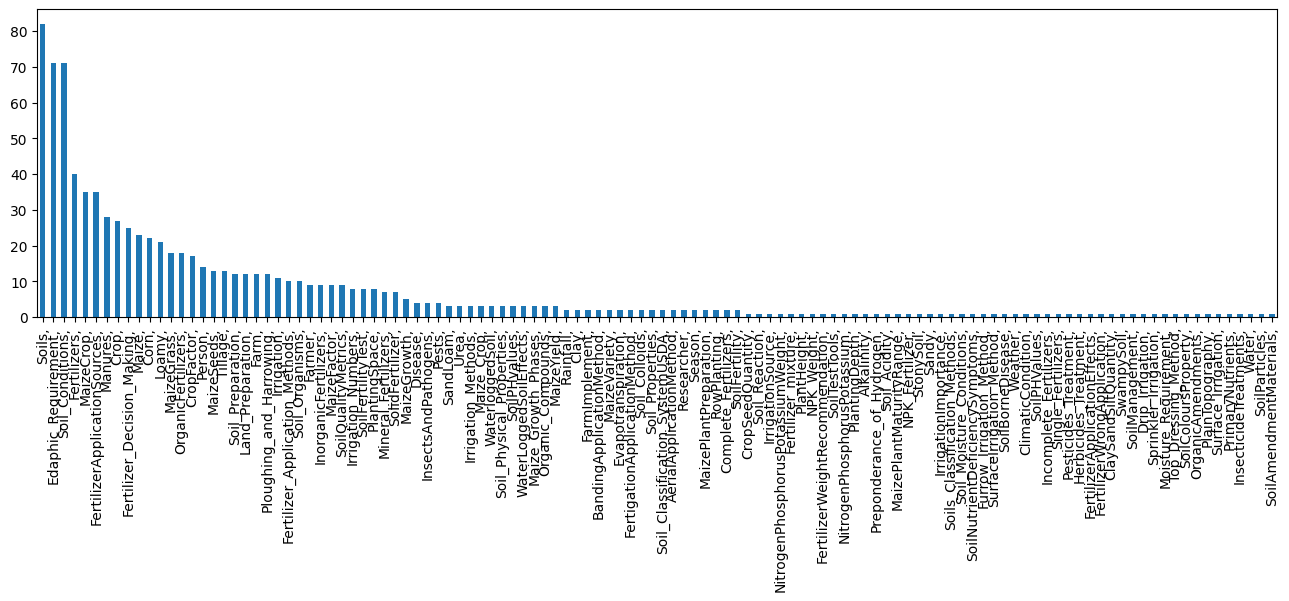

In [148]:
plt.figure(figsize=(16,4))
dataset.intent.value_counts().plot(kind='bar')
plt.show()

In [152]:
dataset.duplicated().sum()

21

In [162]:
dataset.drop_duplicates(keep='first', inplace=True)
print('duplication droped')

duplication droped


In [163]:
dataset.shape

(839, 4)

In [164]:
dataset.head()

,ont_doc,clean_doc,intent,final_doc
2,"Fertilizers, affects, Corn",fertilizers affects corn,"Fertilizers,",fertil affect corn
3,"Fertilizers, affects, Crop",fertilizers affects crop,"Fertilizers,",fertil affect crop
4,"Fertilizers, affects, Maize",fertilizers affects maize,"Fertilizers,",fertil affect maiz
5,"Fertilizers, affects, MaizeGrass",fertilizers affects maize grass,"Fertilizers,",fertil affect maiz grass
6,"Fertilizers, affects, MaizeCrop",fertilizers affects maize crop,"Fertilizers,",fertil affect maiz crop


#### Feature Extraction

In [166]:
dataset.final_doc

2                                      fertil affect corn
3                                      fertil affect crop
4                                      fertil affect maiz
5                                fertil affect maiz grass
6                                 fertil affect maiz crop
                              ...                        
1662     fertil applic method is use in hilli area string
1663     aerial applic method is use in hilli area string
1664               soil amend materi requir fertil string
1665    irrig method suitabl of irrig method depend on...
1666                 irrig method suitabl for maiz string
Name: final_doc, Length: 839, dtype: object

In [179]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# TF - IDF implementation 
idf = TfidfVectorizer()
vocab = idf.fit(dataset.final_doc)
idf_vec = vocab.fit_transform(dataset.final_doc)
idf_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 2 to 1666
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ont_doc    839 non-null    object
 1   clean_doc  839 non-null    object
 2   intent     839 non-null    object
 3   final_doc  839 non-null    object
dtypes: object(4)
memory usage: 32.8+ KB


In [171]:
dataset.intent = dataset.intent.astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 2 to 1666
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ont_doc    839 non-null    object  
 1   clean_doc  839 non-null    object  
 2   intent     839 non-null    category
 3   final_doc  839 non-null    object  
dtypes: category(1), object(3)
memory usage: 32.0+ KB


In [172]:
dataset.intent.unique()

['Fertilizers,', 'Manures,', 'Disease,', 'InsectsAndPathogens,', 'Pests,', ..., 'FertilizerWeightRecommendation,', 'NPK_Weight,', 'NitrogenPhosphorusPotassiumWeight,', 'AerialApplicationMethod,', 'SoilAmendmentMaterials,']
Length: 116
Categories (116, object): ['AerialApplicationMethod,', 'Alkalinity,', 'BandingApplicationMethod,', 'Clay,', ..., 'Water,', 'WaterLoggedSoilEffects,', 'WaterloggedSoil,', 'Weather,']

In [ ]:
#  ENCODING INTENTIONS... OUR OUTPUT CLASSIFICATION LABEL.. 

In [173]:
output_converter = dict(zip(dataset.intent.cat.codes.unique() , dataset.intent.unique()))
output_converter

{26: 'Fertilizers,',
 52: 'Manures,',
 11: 'Disease,',
 32: 'InsectsAndPathogens,',
 64: 'Pests,',
 8: 'Crop,',
 38: 'Land_Preparation,',
 69: 'Ploughing_and_Harrowing,',
 98: 'Soil_Preparation,',
 109: 'Tillage,',
 61: 'Organic_Compounds,',
 96: 'Soil_Organisms,',
 13: 'Edaphic_Requirement,',
 94: 'Soil_Conditions,',
 101: 'Soils,',
 37: 'Irrigation_Numbers,',
 33: 'Irrigation,',
 93: 'Soil_Colloids,',
 99: 'Soil_Properties,',
 92: 'Soil_Classification_SystemUSDA,',
 102: 'Soils_Classification_Methods,',
 95: 'Soil_Moisture_Conditions,',
 20: 'FertilizerApplicationSources,',
 17: 'Farmer,',
 62: 'Person,',
 73: 'Researcher,',
 49: 'MaizeYield,',
 9: 'CropFactor,',
 7: 'Corn,',
 40: 'Maize,',
 85: 'SoilNutrientDeficiencySymptoms,',
 27: 'Furrow_Irrigation_Method,',
 106: 'SurfaceIrrigation_Method,',
 80: 'SoilBorneDisease,',
 115: 'Weather,',
 5: 'ClimaticCondition,',
 41: 'MaizeCrop,',
 30: 'InorganicFertilizers,',
 60: 'OrganicFertilizers,',
 87: 'SoilPHvalues,',
 39: 'Loamy,',
 48: 

In [174]:
# ecoding intent for machine learning development
dataset['intent_code'] = dataset.intent.cat.codes
dataset.head()

,ont_doc,clean_doc,intent,final_doc,intent_code
2,"Fertilizers, affects, Corn",fertilizers affects corn,"Fertilizers,",fertil affect corn,26
3,"Fertilizers, affects, Crop",fertilizers affects crop,"Fertilizers,",fertil affect crop,26
4,"Fertilizers, affects, Maize",fertilizers affects maize,"Fertilizers,",fertil affect maiz,26
5,"Fertilizers, affects, MaizeGrass",fertilizers affects maize grass,"Fertilizers,",fertil affect maiz grass,26
6,"Fertilizers, affects, MaizeCrop",fertilizers affects maize crop,"Fertilizers,",fertil affect maiz crop,26


In [ ]:
#  DATA SPLITTING OPERATION.. 

In [176]:
X = idf_vec.toarray()
y = dataset.intent_code


X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.30)
print(X_train.shape)
print(X_test.shape)

(587, 361)
(252, 361)


In [180]:
# GRADIENT BOOST ALGORITHM 

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.score(X_test,y_test)

0.7777777777777778

In [181]:
prediction = gb.predict(X_test)
acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction, average='weighted')
recc = recall_score(y_test, prediction, average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')

print('Gradient Bost Accuracy: ', acc)
print('Gradient Bost Precision: ', prec)
print('Gradient Bost Recall: ', recc)
print('Gradient Bost f1: ', f1)

Gradient Bost Accuracy:  0.7777777777777778
Gradient Bost Precision:  0.8031197531773568
Gradient Bost Recall:  0.7777777777777778
Gradient Bost f1:  0.7687980043348382


In [ ]:
# RANDOM FOREST ALGORITHM

In [183]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
t_score = rf.score(X_test,y_test)
print(f'Training Score: {t_score}')

prediction = rf.predict(X_test)
acc_idf = accuracy_score(y_test, prediction)
prec_idf = precision_score(y_test, prediction, average='weighted')
recc_idf = recall_score(y_test, prediction, average='weighted')
f1_idf = f1_score(y_test, prediction, average='weighted')

print('Gradient Bost Accuracy: ', acc_idf)
print('Gradient Bost Precision: ', prec_idf)
print('Gradient Bost Recall: ', recc_idf)
print('Gradient Bost f1: ', f1_idf)


Training Score: 0.7817460317460317
Gradient Bost Accuracy:  0.7817460317460317
Gradient Bost Precision:  0.7707305144279935
Gradient Bost Recall:  0.7817460317460317
Gradient Bost f1:  0.7600852926781558


In [203]:
X_train.shape

(587, 361)

In [202]:
# DEEP LEARNING MODEL.. 

In [198]:
dataset.intent_code.unique().shape

(116,)

In [210]:
ont_chat_model = tf.keras.Sequential([
    tf.keras.layers.Input((361,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(116, activation='sigmoid')
])

# compile model 
ont_chat_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ont_chat_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │        46,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 120)            │        15,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 116)            │        14,036 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,364 (360.80 KB)

 Trainable params: 92,364 (360.80 KB)

 Non-trainable params: 0 (0.00 B)

In [211]:
history  = ont_chat_model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=100)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.0536 - loss: 4.7275 - val_accuracy: 0.1151 - val_loss: 4.5523
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0893 - loss: 4.3844 - val_accuracy: 0.1151 - val_loss: 3.7725
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0970 - loss: 3.7221 - val_accuracy: 0.1032 - val_loss: 3.5176
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1477 - loss: 3.4903 - val_accuracy: 0.2024 - val_loss: 3.2426
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2350 - loss: 3.0648 - val_accuracy: 0.2421 - val_loss: 2.9425
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3092 - loss: 2.7621 - val_accuracy: 0.3849 - val_loss: 2.6262
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4925 - loss: 2.3381 - val_accuracy: 0.4643 - val_loss: 2.3579
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5218 - loss: 2.0184 - val_accuracy: 0.5079 - 

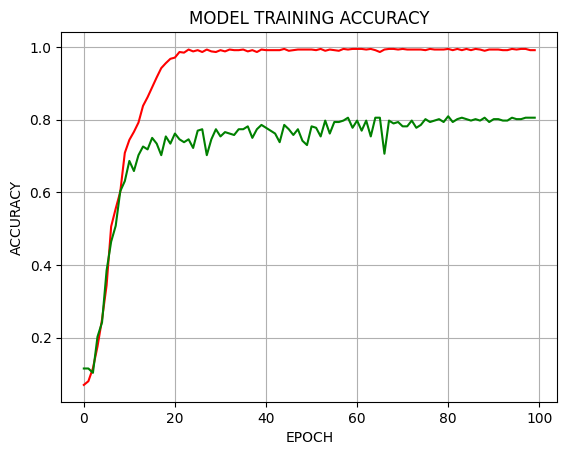

In [212]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('MODEL TRAINING ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.grid()
plt.show()

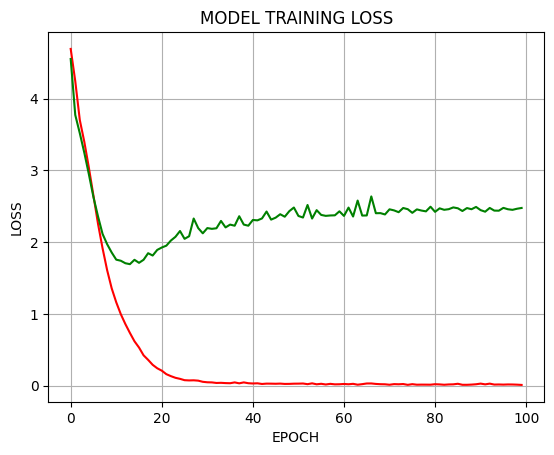

In [213]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('MODEL TRAINING LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.grid()
plt.show()

In [222]:
deep_prediction = ont_chat_model.predict(X_test)
predicted_dnn = [np.argmax(pre) for pre in deep_prediction]
dnn_ac = accuracy_score(y_test, predicted_dnn)
dnn_pre = precision_score(y_test, predicted_dnn, average='weighted')
dnn_rec = recall_score(y_test, predicted_dnn, average='weighted')
dnn_f1 = f1_score(y_test, predicted_dnn, average='weighted')

print(f'Accuracy {dnn_ac}, Precision {dnn_pre}, Recall {dnn_rec}, F1-score {dnn_f1}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Accuracy 0.8055555555555556, Precision 0.8194595068301073, Recall 0.8055555555555556, F1-score 0.7975956586479056


In [214]:
ont_chat_model.save('ont_query.h5')
print('model save')

model save


In [ ]:
# PERFORMNACE COMPARISION CHAT

In [224]:
gb_count_vec  = ['GB ALGO', acc, prec, recc, f1]
gb_idf_vec  = [ 'RF ALGO',  acc_idf, prec_idf, recc_idf, f1_idf]
dnn = ['DNN ARCH', dnn_ac, dnn_pre, dnn_rec , dnn_f1]

ml_perf = np.array((gb_count_vec, gb_idf_vec, dnn))
ml_metric_table = pd.DataFrame(ml_perf, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])
ml_metric_table.Accuracy = ml_metric_table.Accuracy.astype('float16')
ml_metric_table.Precision = ml_metric_table.Precision.astype('float16')
ml_metric_table.Recall = ml_metric_table.Recall.astype('float16')
ml_metric_table.F1_score = ml_metric_table.F1_score.astype('float16')


ml_metric_table


,Model,Accuracy,Precision,Recall,F1_score
0,GB ALGO,0.777832,0.803223,0.777832,0.768555
1,RF ALGO,0.781738,0.770508,0.781738,0.760254
2,DNN ARCH,0.805664,0.819336,0.805664,0.797363


saved as csv file


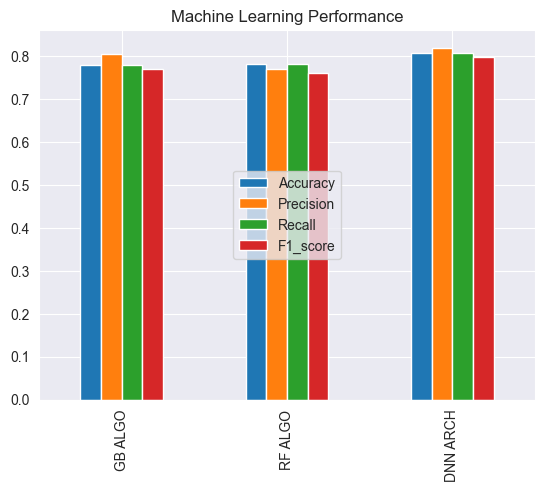

In [234]:
ml_metric_table.to_csv('ml_result.csv')
print('saved as csv file')

import seaborn as sn 

sn.set_style(style='darkgrid')

ml_metric_table.plot(kind='bar')
plt.xticks([0,1,2], labels=ml_metric_table.Model)
plt.title('Machine Learning Performance')
plt.legend(loc='center')
plt.show()

In [ ]:
# SAVING OF MODELS 

In [231]:
# saving vectorizer 
import joblib

joblib.dump(gb, 'gb_onto_model.jb')
joblib.dump(rf, 'rf_onto_model.jb')
joblib.dump(idf, 'tf_vectorizer.jb')
print('ALL model saved')

ALL model saved


### Ontology Query System

In [232]:
import tensorflow as tf
import joblib
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np 

ps = PorterStemmer()

# create a funtion to load model, load feature converter and also label converter
def load_ontology_models(model_object, path):
    model = tf.keras.models.load_model(model_object)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # load vectorizer 
    vectorizer = joblib.load(path)
    
    return model, vectorizer

def process_input(query, ont_model, vector):
    # convert query to numberic
    # text = 'body water provide quantity'
    split_text = word_tokenize(query)
    stem_text = ' '.join([ps.stem(txt) for txt in split_text])
    # print(stem_text)
    features = vector.transform([stem_text]).toarray()
    print(features)
    # predict model
    # print(X_input)
    # ANN MODEL
    if features.sum() != 0: 
        prob = model.predict(features)
        # print(prob[0])
        prediction = np.argmax(prob[0])
        print('Prediction:', prediction, ' Max Probability Score:' , prob[0][prediction])
        print('-----------------------------------------------------------------------')
        print(prob)
        # prediction converter 
        user_intention = output_converter[prediction]
        user_intention
    
        pulled_information = dataset[dataset.intent == prediction]['clean_doc'].tolist()
        
        return user_intention, pulled_information
    else:
        print('Ontology Evolution')
        return (0, 0)
    


# get model
model, vect = load_ontology_models('ont_query.h5', 'tf_vectorizer.jb')

# get features
text = input('DL Query: ')
result = process_input(text, model, vect)
result

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

('Fertilizers,', [])